In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
from sklearn.datasets import make_moons

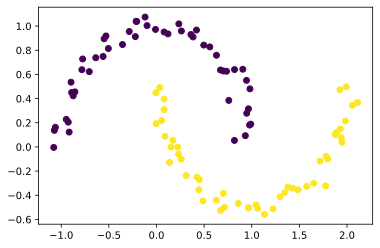

In [2]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)
plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1]);

# DBSCAN 

**Density Based Spatial Clustering of Applications with Noise**

![](data/dbscan.png)


DBSCAN requiere de dos parámetros:

+ $\epsilon$ : distancia de la vecindad
+ Número mínimo de puntos para considerarla vecindad

Se comienza con un punto arbitrario que no haya sido visitado. La $\epsilon$-vecindad de éste punto se evalúa, para determinar su densidad y si tiene suficientes puntos se clusteriza, si no, se considera que el punto es ruido.


**Ventajas**
+ No necesita saber el nº de clusters
+ Se reduce el single-link (un cluster dentro de otro)
+ Tiene noción del ruido (detecta muy bien outliers)
+ Solo dos parámetros


**Desventajas**
+ No es determinista en los límites del cluster
+ Depende de la distancia
+ No puede manejar grandes diferencias de densidad

In [3]:
from sklearn.cluster import DBSCAN

In [5]:
help(DBSCAN)

Help on class DBSCAN in module sklearn.cluster._dbscan:

class DBSCAN(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  DBSCAN(eps=0.5, *, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=None)
 |  
 |  Perform DBSCAN clustering from vector array or distance matrix.
 |  
 |  DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
 |  Finds core samples of high density and expands clusters from them.
 |  Good for data which contains clusters of similar density.
 |  
 |  Read more in the :ref:`User Guide <dbscan>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=0.5
 |      The maximum distance between two samples for one to be considered
 |      as in the neighborhood of the other. This is not a maximum bound
 |      on the distances of points within a cluster. This is the most
 |      important DBSCAN parameter to choose appropriately for your data set
 |      and distance function.
 |  
 |  min_sam

In [24]:
dbscan = DBSCAN() #Default epsilon con 0.5, y metric es euclideana 

In [25]:
dbscan.fit(moons[0])

DBSCAN()

In [26]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

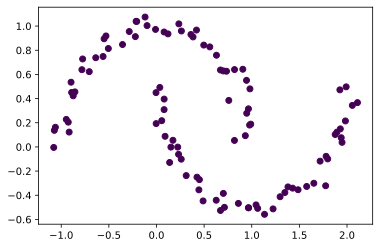

In [27]:
plt.scatter(moons[0][:,0], moons[0][:,1], c = dbscan.labels_)

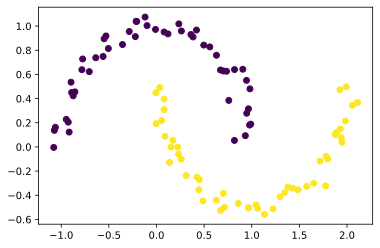

In [29]:
dbscan = DBSCAN(eps = 0.25) #cambiando parametros para epsilon que afecta el tamaño de las vecindades 
dbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c = dbscan.labels_)

In [30]:
#los clusters son mas claros debido al tamño de la vecindad

# HDBSCAN

**Hierarchical DBSCAN**

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Extiende DBSCAN haciéndolo jerárquico. El algoritmo se basa en:

1) Transformar el espacio según densidad

2) Grafo de árboles de distancias

3) Cluster jerárquicos

4) Condensar los clusters basándose en el tamaño

5) Extraer clusters estables desde el árbol

In [31]:
from hdbscan import HDBSCAN

In [32]:
help(HDBSCAN)

Help on class HDBSCAN in module hdbscan.hdbscan_:

class HDBSCAN(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.0, metric='euclidean', alpha=1.0, p=None, algorithm='best', leaf_size=40, memory=Memory(location=None), approx_min_span_tree=True, gen_min_span_tree=False, core_dist_n_jobs=4, cluster_selection_method='eom', allow_single_cluster=False, prediction_data=False, match_reference_implementation=False, **kwargs)
 |  
 |  Perform HDBSCAN clustering from vector array or distance matrix.
 |  
 |  HDBSCAN - Hierarchical Density-Based Spatial Clustering of Applications
 |  with Noise. Performs DBSCAN over varying epsilon values and integrates
 |  the result to find a clustering that gives the best stability over epsilon.
 |  This allows HDBSCAN to find clusters of varying densities (unlike DBSCAN),
 |  and be more robust to parameter selection.
 |  
 |  Parameters
 |  ----------
 |  min_cluster_size : i

In [44]:
hdbscan = HDBSCAN(gen_min_span_tree=True) 

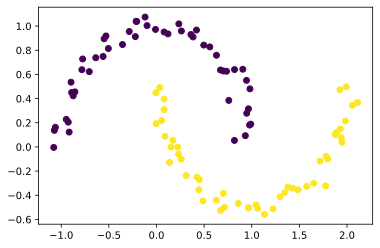

In [45]:
hdbscan.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c = hdbscan.labels_)

In [46]:
#probabilidades de hsdbscan

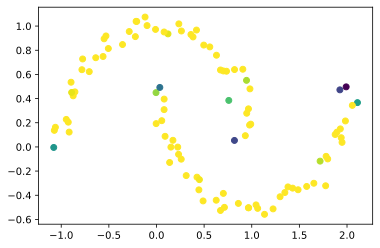

In [47]:
plt.scatter(moons[0][:,0], moons[0][:,1], c = hdbscan.probabilities_)

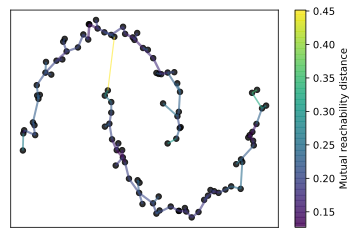

In [51]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                    edge_alpha = 0.6,
                                   node_size = 30,
                                   edge_linewidth = 1.2);

<AxesSubplot:ylabel='distance'>

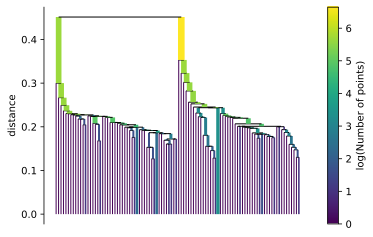

In [52]:
hdbscan.single_linkage_tree_.plot(cmap = 'viridis',
                                 colorbar= True)

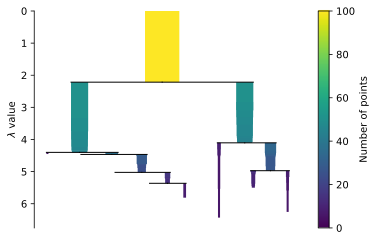

In [54]:
hdbscan.condensed_tree_.plot();

In [55]:
import seaborn as sns

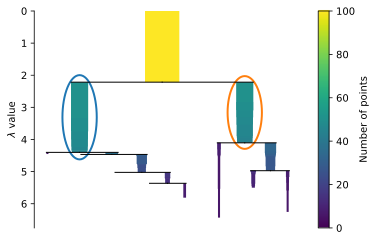

In [57]:
hdbscan.condensed_tree_.plot(select_clusters = True,
                            selection_palette = sns.color_palette());

# OPTICS

**Ordering Points To Identify the Clustering Structure**

Generalización del DBSCAN, busca el núcleo de la muestra con la más alta densidad y expande los clusteres desde ahí.

![](data/optics.png)

In [58]:
from sklearn.cluster import OPTICS

In [59]:
help(OPTICS)

Help on class OPTICS in module sklearn.cluster._optics:

class OPTICS(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  OPTICS(*, min_samples=5, max_eps=inf, metric='minkowski', p=2, metric_params=None, cluster_method='xi', eps=None, xi=0.05, predecessor_correction=True, min_cluster_size=None, algorithm='auto', leaf_size=30, n_jobs=None)
 |  
 |  Estimate clustering structure from vector array.
 |  
 |  OPTICS (Ordering Points To Identify the Clustering Structure), closely
 |  related to DBSCAN, finds core sample of high density and expands clusters
 |  from them [1]_. Unlike DBSCAN, keeps cluster hierarchy for a variable
 |  neighborhood radius. Better suited for usage on large datasets than the
 |  current sklearn implementation of DBSCAN.
 |  
 |  Clusters are then extracted using a DBSCAN-like method
 |  (cluster_method = 'dbscan') or an automatic
 |  technique proposed in [1]_ (cluster_method = 'xi').
 |  
 |  This implementation deviates from the original OPTICS by first

In [75]:
opt = OPTICS(eps = 0.7)

In [77]:
opt.labels_

array([-1,  1, -1,  2,  3,  1,  0,  2,  7,  6,  4,  4, -1,  4, -1, -1,  7,
        7,  7, -1,  0, -1,  0, -1,  4,  3,  6,  7,  6, -1, -1, -1,  7,  0,
       -1, -1,  2,  1, -1,  0, -1,  0,  3,  3, -1, -1,  6,  4,  1,  5, -1,
       -1,  1, -1,  7,  4, -1,  6,  3, -1, -1, -1, -1,  5,  5, -1,  2,  1,
       -1, -1, -1,  2,  7,  3,  5, -1, -1, -1,  4, -1,  6,  7,  4,  0,  5,
        2, -1, -1, -1, -1, -1, -1,  4,  7,  6, -1,  7,  1,  6,  5])

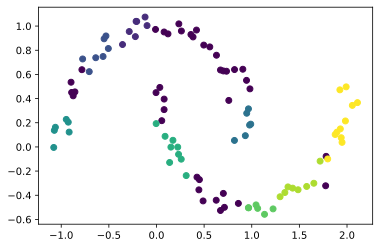

In [76]:
opt.fit(moons[0])
plt.scatter(moons[0][:,0], moons[0][:,1], c = opt.labels_)

# GMM

**Gaussian Mixture Models**

Se asume que los datos son mezclas de un nº finito de distribuciones gaussianas de parámetros desconocidos (N($\mu$,$\sigma$))


![](data/gmm.png)


![](data/gmm2.png)

In [78]:
from sklearn.mixture import GaussianMixture as GM

In [80]:
help(GM)

Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

class GaussianMixture(sklearn.mixture._base.BaseMixture)
 |  GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
 |  
 |  Gaussian Mixture.
 |  
 |  Representation of a Gaussian mixture model probability distribution.
 |  This class allows to estimate the parameters of a Gaussian mixture
 |  distribution.
 |  
 |  Read more in the :ref:`User Guide <gmm>`.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  n_components : int, defaults to 1.
 |      The number of mixture components.
 |  
 |  covariance_type : {'full' (default), 'tied', 'diag', 'spherical'}
 |      String describing the type of covariance parameters to use.
 |      Must be one of:
 |  
 |      'full'
 |          each compon

In [79]:
gm = GM(n_components = 2, covariance_type = 'full')

In [81]:
gm.fit(moons[0])

GaussianMixture(n_components=2)

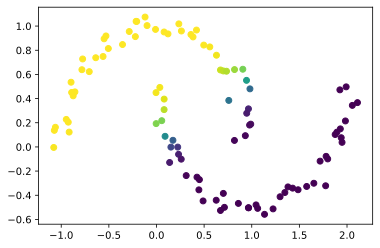

In [84]:
plt.scatter(moons[0][:,0], moons[0][:,1], c = gm.predict_proba(moons[0])[:,1])

In [86]:
from sklearn.datasets import make_classification as mc

In [88]:
#data set sintetico
x = mc(n_features = 2, n_redundant = 0, n_informative = 2, n_clusters_per_class = 1)

In [89]:
gm = GM(n_components = 2, covariance_type = 'full')

In [91]:
gm.fit(x[0])

GaussianMixture(n_components=2)

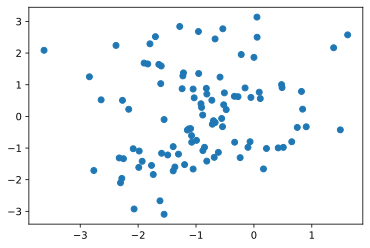

In [93]:
plt.scatter(x[0][:,0], x[0][:,1]);

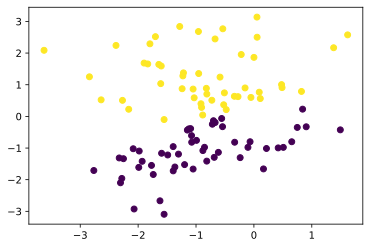

In [97]:
plt.scatter(x[0][:,0], x[0][:,1], c=gm.predict(x[0]));

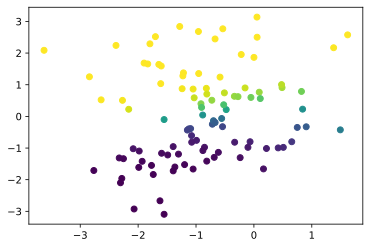

In [98]:
plt.scatter(x[0][:,0], x[0][:,1], c=gm.predict_proba(x[0])[:,1]);

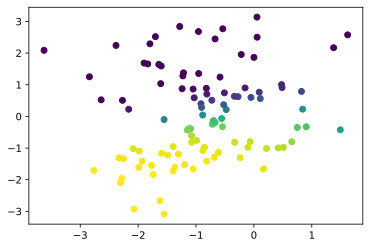

In [99]:
plt.scatter(x[0][:,0], x[0][:,1], c=gm.predict_proba(x[0])[:,0]);

![](data/usl_models.png)

In [100]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
import pandas as pd
import seaborn as sns
import numpy as np

In [102]:
breadbasket = pd.read_csv('data/breadbasket_dms.csv')
breadbasket.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [103]:
breadbasket.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [104]:
breadbasket.dtypes

Date           object
Time           object
Transaction     int64
Item           object
dtype: object

In [105]:
breadbasket['datetime'] = pd.to_datetime(breadbasket['Date']+' '+breadbasket['Time'],
                                        format='%Y-%m-%d %H:%M:%S')

In [106]:
breadbasket.head()

,Date,Time,Transaction,Item,datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [110]:
breadbasket.dtypes

Date                   object
Time                   object
Transaction             int64
Item                   object
datetime       datetime64[ns]
dtype: object

In [107]:
breadbasket['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [109]:
breadbasket['Item'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Raw bars             1
Polenta              1
Gift voucher         1
Olum & polenta       1
Adjustment           1
Name: Item, Length: 95, dtype: int64

In [112]:
beverage = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 'Juice', 'Coke', 'Smoothies']
other = ['NONE', 'Christmas common', 'Gift voucher', "Valentine's card", 'Tshirt', 'Afternoon with the baker', 'Postcard', 'Siblings', 'Nomad bag', 'Adjustment', 'Drinking chocolate spoons ', 'Coffee granules ']
kids = ["Ella's Kitchen Pouches", 'My-5 Fruit Shoot', 'Kids biscuit']
snacks = ['Mighty Protein', 'Pick and Mix Bowls', 'Caramel bites', 'Bare Popcorn', 'Crisps', 'Cherry me Dried fruit', 'Raw bars']
bread = ['Bread', 'Toast', 'Baguette', 'Focaccia', 'Scandinavian']
breakfast_pastry = ['Muffin', 'Pastry', 'Medialuna', 'Scone']
dessert = ['Cookies', 'Tartine', 'Fudge', 'Victorian Sponge', 'Cake', 'Alfajores', 'Brownie', 'Bread Pudding', 'Bakewell', 'Raspberry shortbread sandwich', 'Lemon and coconut', 'Crepes', 'Chocolates', 'Truffles', 'Panatone']
condiments = ['Jam', 'Dulce de Leche', 'Honey', 'Gingerbread syrup', 'Extra Salami or Feta', 'Bacon', 'Spread', 'Chimichurri Oil']
breakfast = ['Eggs', 'Frittata', 'Granola', 'Muesli', 'Duck egg', 'Brioche and salami']
lunch = ['Soup', 'Sandwich', 'Chicken sand', 'Salad', 'Chicken Stew']



In [113]:
food = beverage+other+kids+snacks+bread+breakfast_pastry+dessert+breakfast+lunch

In [115]:
len(food)

64

In [116]:
other_food = [e for e in breadbasket['Item'].unique() if e not in food]

In [121]:
food_list=[beverage, other, kids, snacks, bread, breakfast_pastry, dessert, condiments, breakfast, lunch]
food_names=['beverage', 'other', 'kids', 'snacks', 'bread', 'breakfast_pastry', 'dessert', 'condiments', 'breakfast', 'lunch']


In [122]:
for i in range(len(food_names)):
    breadbasket[food_names[i]] = np.where(breadbasket['Item'].isin(food_list[i]),1, 0)

In [123]:
breadbasket.head()

,Date,Time,Transaction,Item,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34,0,0,0,0,1,0,0,0,0,0
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57,1,0,0,0,0,0,0,0,0,0
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57,0,0,0,0,0,0,0,1,0,0


In [126]:
bread_group = breadbasket.groupby(['datetime','Transaction']).sum()
bread_group

,,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
datetime,Transaction,,,,,,,,,,
2016-10-30 09:58:11,1,0,0,0,0,1,0,0,0,0,0
2016-10-30 10:05:34,2,0,0,0,0,2,0,0,0,0,0
2016-10-30 10:07:57,3,1,0,0,0,0,0,1,1,0,0
2016-10-30 10:08:41,4,0,0,0,0,0,1,0,0,0,0
2016-10-30 10:13:03,5,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-04-09 14:24:03,9680,0,0,0,0,1,0,0,0,0,0
2017-04-09 14:30:09,9681,1,1,0,0,0,0,1,0,0,0
2017-04-09 14:32:58,9682,2,0,0,0,0,1,0,0,0,0


In [128]:
bread_group.shape

(9531, 10)

In [130]:
breadbasket.shape

(21293, 15)

In [131]:
bread_group.reset_index(level = 'datetime', inplace = True)
bread_group.head()

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch
Transaction,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0


In [155]:
bread_group['day'] = bread_group['datetime'].dt.day_name()
bread_group['hour'] = bread_group['datetime'].dt.hour
bread_group['month'] = bread_group['datetime'].dt.month

In [156]:
bread_group.head()

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,day,hour,month
Transaction,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday,9,10
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday,10,10
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday,10,10
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday,10,10
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday,10,10


<AxesSubplot:>

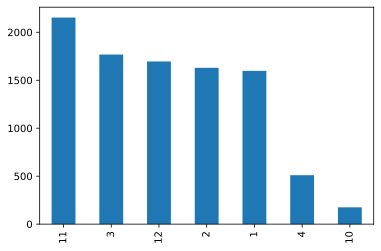

In [157]:
bread_group['month'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

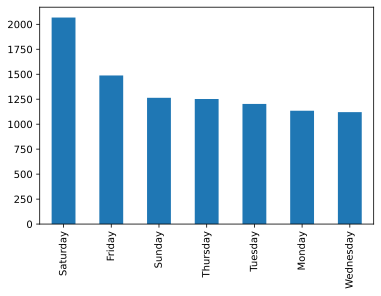

In [158]:
bread_group['day'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

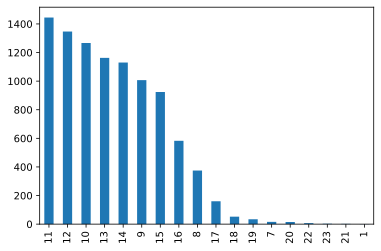

In [159]:
bread_group['hour'].value_counts().plot(kind = 'bar')

In [161]:
bread_dummy = pd.get_dummies(bread_group, columns =['day']).drop('datetime', axis = 1)
bread_dummy

,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,hour,month,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,9,10,0,0,0,1,0,0,0
2,0,0,0,0,2,0,0,0,0,0,10,10,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,1,0,0,10,10,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,10,10,0,0,0,1,0,0,0
5,1,0,0,0,1,1,0,0,0,0,10,10,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,1,0,0,0,0,0,14,4,0,0,0,1,0,0,0
9681,1,1,0,0,0,0,1,0,0,0,14,4,0,0,0,1,0,0,0
9682,2,0,0,0,0,1,0,0,0,0,14,4,0,0,0,1,0,0,0


In [162]:
from sklearn.decomposition import PCA

In [163]:
bread_dummy.isna().sum()

beverage            0
other               0
kids                0
snacks              0
bread               0
breakfast_pastry    0
dessert             0
condiments          0
breakfast           0
lunch               0
hour                0
month               0
day_Friday          0
day_Monday          0
day_Saturday        0
day_Sunday          0
day_Thursday        0
day_Tuesday         0
day_Wednesday       0
dtype: int64

In [164]:
bread_dummy.dtypes

beverage            int32
other               int32
kids                int32
snacks              int32
bread               int32
breakfast_pastry    int32
dessert             int32
condiments          int32
breakfast           int32
lunch               int32
hour                int64
month               int64
day_Friday          uint8
day_Monday          uint8
day_Saturday        uint8
day_Sunday          uint8
day_Thursday        uint8
day_Tuesday         uint8
day_Wednesday       uint8
dtype: object

In [170]:
for i in bread_dummy.columns[-9:]:
    bread_dummy[i] = bread_dummy.astype('int32')

In [171]:
bread_dummy.fillna(0, inplace = True)

In [172]:
bread_dummy.dtypes

beverage            int32
other               int32
kids                int32
snacks              int32
bread               int32
breakfast_pastry    int32
dessert             int32
condiments          int32
breakfast           int32
lunch               int32
hour                int32
month               int32
day_Friday          int32
day_Monday          int32
day_Saturday        int32
day_Sunday          int32
day_Thursday        int32
day_Tuesday         int32
day_Wednesday       int32
dtype: object

In [173]:
pca = PCA(n_components = 2).fit_transform(bread_dummy)
pca

array([[-2.78695145, -0.43172341],
       [-2.85240405, -1.23746511],
       [ 0.46218491,  0.73661051],
       ...,
       [ 3.59793967, -0.11257886],
       [ 0.44529475,  0.11884388],
       [ 0.43114607,  0.14259554]])

In [174]:
df_pca = pd.DataFrame(pca, columns = ['pca_1','pca_2'])
df_pca

,pca_1,pca_2
0,-2.786951,-0.431723
1,-2.852404,-1.237465
2,0.462185,0.736611
3,-2.707350,0.350267
4,0.379842,-0.686898
...,...,...
9526,-2.786951,-0.431723
9527,0.472526,0.727154
9528,3.597940,-0.112579
9529,0.445295,0.118844


<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

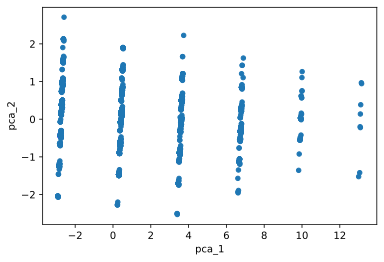

In [175]:
df_pca.plot.scatter(x = 'pca_1',y ='pca_2')

In [184]:
from umap import UMAP

umap=UMAP(n_components=2, metric= 'euclidean').fit_transform(bread_dummy)

<AxesSubplot:xlabel='umap_1', ylabel='umap_2'>

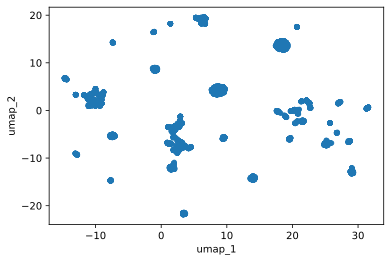

In [185]:
umap_df = pd.DataFrame(umap, columns= ['umap_1','umap_2']) 
#usando umap no se ve tan claro ya que la dispersion y la distancia entre valores es diferente
umap_df.plot.scatter(x='umap_1',y ='umap_2')

In [186]:
from sklearn.cluster import KMeans

In [187]:
kmeans = KMeans(n_clusters= 3).fit(df_pca)

In [189]:
bread_group['cluster'] = kmeans.labels_
bread_group.head()

,datetime,beverage,other,kids,snacks,bread,breakfast_pastry,dessert,condiments,breakfast,lunch,day,hour,month,cluster
Transaction,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,1,0,0,0,0,0,Sunday,9,10,0
2,2016-10-30 10:05:34,0,0,0,0,2,0,0,0,0,0,Sunday,10,10,0
3,2016-10-30 10:07:57,1,0,0,0,0,0,1,1,0,0,Sunday,10,10,1
4,2016-10-30 10:08:41,0,0,0,0,0,1,0,0,0,0,Sunday,10,10,0
5,2016-10-30 10:13:03,1,0,0,0,1,1,0,0,0,0,Sunday,10,10,1


In [191]:
cm=sns.light_palette('green', as_cmap=True)
pd.crosstab(bread_group['hour'], bread_group['cluster']).style.background_gradient(cmap= cm)

cluster,0,1,2
hour,,,
1,1,0,0
7,4,11,1
8,173,172,30
9,398,455,154
10,468,535,264
11,533,579,333
12,559,521,267
13,446,487,230
14,401,472,257


In [214]:
kmeans = KMeans(n_clusters= 11).fit(df_pca)
bread_group['cluster'] = kmeans.labels_

cm=sns.light_palette('green', as_cmap=True)
pd.crosstab(bread_group['hour'], bread_group['cluster']).style.background_gradient(cmap= cm)

cluster,0,1,2,3,4,5,6,7,8,9,10
hour,,,,,,,,,,,
1,0,1,0,0,0,0,0,0,0,0,0
7,1,1,9,0,3,0,0,2,0,0,0
8,18,128,113,4,39,0,12,47,3,5,6
9,79,274,320,25,92,0,30,105,21,29,32
10,144,314,343,33,115,3,70,122,39,45,39
11,163,323,354,49,153,9,97,128,64,48,57
12,120,294,327,39,183,6,73,121,60,42,82
13,116,195,326,28,179,5,84,77,59,22,72
14,107,181,297,37,124,9,96,79,77,27,96


In [215]:
pd.crosstab(bread_group['day'], bread_group['cluster']).style.background_gradient(cmap= cm)

cluster,0,1,2,3,4,5,6,7,8,9,10
day,,,,,,,,,,,
Friday,113,308,417,47,179,6,99,138,61,39,81
Monday,126,200,349,20,137,1,69,95,59,28,51
Saturday,191,501,467,75,263,10,121,155,98,63,124
Sunday,131,251,260,53,134,12,98,113,88,49,75
Thursday,100,242,335,39,161,4,95,115,52,37,72
Tuesday,129,230,370,18,132,6,103,84,49,23,59
Wednesday,117,246,294,28,110,4,84,92,57,35,54


In [216]:
clus_sat = bread_group[(bread_group['day'] == 'Saturday') & (bread_group['cluster'] == 0)]

In [217]:
clus_sat.groupby(['month','day','hour']).sum()

beverage  other  kids  snacks  bread  breakfast_pastry  \
month day      hour                                                           
1     Saturday 8            2      0     0       0      0                 0   
               9            6      1     0       0      0                 1   
               10           6      0     0       0      0                 2   
               11          16      2     0       0      1                 5   
               12          10      2     0       0      1                 1   
               13           8      0     0       0      1                 1   
               14          12      1     0       0      1                 1   
               15          12      0     0       0      2                 3   
               16           4      0     0       0      0                 0   
2     Saturday 8            2      1     0       0      0                 0   
               9            4      0     0       0      0                 0   
               10           6      2     0       0      0                 1   
               11           8      1     0       0      0                 2   
               12          10      0     0       0      0                 2   
               13           2      0     0       0      0                 0   
               14           6      0     0       0      0                 1   
               15           6      0     0       0      0                 0   
               16           2      0     0       0      0                 0   
               17           2      0     0       0      0                 0   
               19           2      0     0       0      0                 0   
3     Saturday 8            2      0     0       0      0                 1   
               9            6      1     0       0      0                 1   
               10           2      0     0       0      0                 0   
               11          10      0     0       0      0                 3   
               12          12      1     0       0      2                 2   
               13          16      1     0       0      2                 2   
               14           8      0     0       0      0                 3   
               15           8      1     0       0      1                 0   
               16           2      0     0       0      0                 0   
               17           4      0     0       0      1                 0   
4     Saturday 10           4      0     0       0      0                 0   
               11           4      0     0       0      1                 1   
               12           8      1     0       0      0                 0   
               13           4      0     0       0      1                 0   
               14           2      0     0       0      0                 0   
               17           2      0     0       0      0                 0   
11    Saturday 8            4      1     0       0      0                 2   
               10          12      1     0       0      2                 3   
               11          18      2     0       0      1                 2   
               12          14      1     0       0      0                 0   
               13          14      2     0       0      1                 1   
               14           6      0     0       0      0                 0   
               15           8      0     1       1      0                 3   
               16           2      0     0       0      1                 0   
12    Saturday 9            8      2     0       0      0                 3   
               10          12      1     0       1      1                 2   
               11          16      1     0       0      0                 3   
               12          10      3     0       0      1                 1   
               13           8      1     0       0      1              

In [218]:
bread_merge = breadbasket.merge(bread_group.reset_index()[['cluster','Transaction']], on = 'Transaction', how = 'left')

In [220]:
pd.DataFrame(bread_merge.groupby('cluster')['Item'].value_counts().to_frame('counts').reset_index()\
           .set_index('Item').groupby('cluster')['counts'].nlargest())

counts
cluster Item                 
0       Coffee           1193
        Tea               327
        Hot chocolate     145
        Pastry            134
        Sandwich          120
1       Bread            1843
        Scandinavian      204
        Pastry            151
        Baguette          105
        Medialuna          83
2       Coffee           1798
        Tea               403
        NONE              225
        Sandwich          218
        Pastry            197
3       Coffee            498
        Tea               113
        Juice              84
        Hot chocolate      82
        Cake               65
4       Farm House        234
        Bread             200
        Pastry            136
        Medialuna         102
        Sandwich           99
5       Coffee             88
        Tea                27
        Hot chocolate      26
        Juice              21
        Cake               17
6       Coffee            432
        Cake              292
        Tea               149
        Cookies           144
        Brownie           120
7       Bread             713
        Coffee            578
        Tea               138
        Toast             132
        Pastry             86
8       Coffee            536
        Cake              239
        Tea               185
        Cookies           117
        Hot chocolate     104
9       Coffee            348
        Bread             218
        Tea                93
        Toast              82
        Hot chocolate      55
10      Cake              210
        Cookies            97
        Fudge              95
        Alfajores          75
        Brownie            71